## Подготовка данных

### Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from IPython.display import display
from time import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
RANDOM_STATE = 42

In [3]:
try:
    df = pd.read_csv('/datasets/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
except:
    df = pd.read_csv('...', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26


Дан датасет 354369 записей, 16 признаков. Признаки разных типов (категории, числовые, дата), есть пустые ячейки.

### Разделение на train/test

In [4]:
df_train, df_test =  train_test_split(df, test_size=0.3, random_state=RANDOM_STATE)

In [5]:
df_train

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
246550,2016-03-22 14:53:58,4600,bus,2005,manual,105,caddy,150000,4,gasoline,volkswagen,no,2016-03-22,0,38228,2016-03-22 14:53:58
113274,2016-03-14 16:51:26,5300,small,2002,manual,116,cooper,125000,4,petrol,mini,no,2016-03-14,0,86420,2016-03-14 16:51:26
35527,2016-03-05 14:27:16,4990,coupe,2002,manual,170,3er,125000,2,petrol,bmw,no,2016-03-05,0,65185,2016-03-25 11:49:19
321785,2016-03-19 21:55:27,6499,small,2009,manual,155,other,80000,10,petrol,alfa_romeo,NaN,2016-03-19,0,71384,2016-04-05 11:18:08
115179,2016-03-10 13:54:26,1400,sedan,1999,manual,75,golf,150000,7,petrol,volkswagen,no,2016-03-10,0,97922,2016-03-14 10:46:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2016-03-20 13:42:09,200,small,1998,manual,50,polo,150000,10,petrol,volkswagen,yes,2016-03-20,0,35099,2016-04-06 14:44:24
259178,2016-04-02 00:47:21,4690,NaN,2017,manual,105,astra,125000,8,petrol,opel,no,2016-04-01,0,9526,2016-04-06 04:16:31
131932,2016-03-27 17:52:44,12525,sedan,2004,manual,192,5er,150000,6,petrol,bmw,no,2016-03-27,0,90530,2016-04-05 14:16:22
146867,2016-03-22 05:36:17,4444,sedan,2004,manual,150,3er,150000,2,gasoline,bmw,no,2016-03-22,0,51069,2016-03-22 08:46:23


In [6]:
df_test

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
294049,2016-03-20 20:54:33,19999,wagon,2014,manual,122,leon,30000,3,petrol,seat,no,2016-03-20,0,22089,2016-03-27 10:47:13
76415,2016-03-25 12:56:02,14250,wagon,2011,manual,140,a3,70000,6,gasoline,audi,NaN,2016-03-25,0,45770,2016-03-29 11:48:26
212563,2016-03-09 13:46:02,2850,wagon,2001,manual,131,passat,150000,9,gasoline,volkswagen,no,2016-03-09,0,38259,2016-03-12 11:16:57
109307,2016-03-30 11:39:47,50,small,1996,manual,60,corsa,150000,8,petrol,opel,yes,2016-03-30,0,7957,2016-04-03 00:46:29
248545,2016-03-28 23:37:54,500,NaN,2016,manual,82,a_klasse,150000,2,petrol,mercedes_benz,NaN,2016-03-28,0,49356,2016-03-30 23:17:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254129,2016-03-13 11:38:50,5950,wagon,2008,manual,120,3_reihe,100000,9,petrol,peugeot,no,2016-03-13,0,65719,2016-03-27 21:45:21
185667,2016-03-26 10:54:22,1600,bus,2000,manual,116,alhambra,150000,4,petrol,seat,no,2016-03-26,0,38440,2016-04-05 22:16:04
58518,2016-03-11 18:25:26,2550,wagon,2003,NaN,0,sharan,150000,7,gasoline,volkswagen,NaN,2016-03-11,0,60314,2016-03-11 18:48:11
54137,2016-04-03 10:53:49,1900,wagon,2003,manual,120,laguna,150000,11,petrol,renault,no,2016-04-03,0,99897,2016-04-07 11:46:31


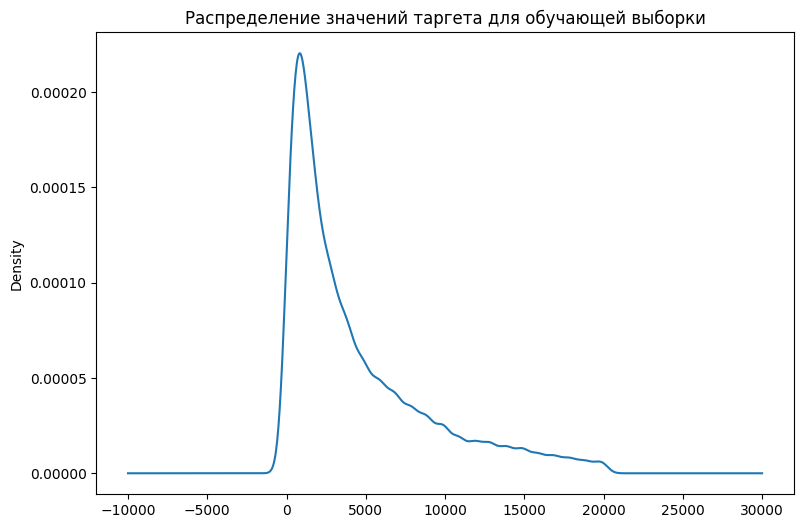

In [7]:
df_train['Price'].plot.kde(figsize=(9, 6), title='Распределение значений таргета для обучающей выборки');

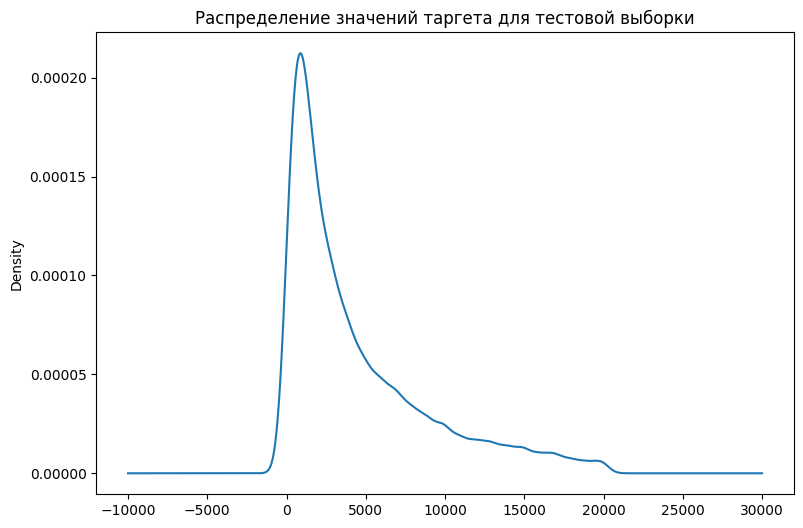

In [8]:
df_test['Price'].plot.kde(figsize=(9, 6), title='Распределение значений таргета для тестовой выборки');

Разделила данные случайным образом на обучающую и тестовую выборки в соотношении 70 на 30. По графикам распределений таргета для обучащей и тестовой выборок видно, что таргеты для двух выборок распределены похожим образом.

Далее буду проводить анализ только обучающих данных, чтобы не допустить влияние тестовых данных на обучения моделей.

### Анализ обучающей выборки

Признаки:

DateCrawled — дата скачивания анкеты из базы

VehicleType — тип автомобильного кузова

RegistrationYear — год регистрации автомобиля

Gearbox — тип коробки передач

Power — мощность (л. с.)

Model — модель автомобиля

Kilometer — пробег (км)

RegistrationMonth — месяц регистрации автомобиля

FuelType — тип топлива

Brand — марка автомобиля

Repaired — была машина в ремонте или нет

DateCreated — дата создания анкеты

NumberOfPictures — количество фотографий автомобиля

PostalCode — почтовый индекс владельца анкеты (пользователя)

LastSeen — дата последней активности пользователя

Целевой признак:

Price — цена (евро)

#### Удаление дубликатов

In [9]:
df_train.duplicated().sum()

2

In [10]:
df_train.shape

(248058, 16)

In [11]:
df_train = df_train.drop_duplicates()

In [12]:
df_train.shape

(248056, 16)

#### Анализ колонок

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248056 entries, 246550 to 121958
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        248056 non-null  datetime64[ns]
 1   Price              248056 non-null  int64         
 2   VehicleType        221825 non-null  object        
 3   RegistrationYear   248056 non-null  int64         
 4   Gearbox            234114 non-null  object        
 5   Power              248056 non-null  int64         
 6   Model              234222 non-null  object        
 7   Kilometer          248056 non-null  int64         
 8   RegistrationMonth  248056 non-null  int64         
 9   FuelType           224884 non-null  object        
 10  Brand              248056 non-null  object        
 11  Repaired           198102 non-null  object        
 12  DateCreated        248056 non-null  datetime64[ns]
 13  NumberOfPictures   248056 non-null  int

Имеется 3 колонки типа datetime64[ns], 7 колонок типа int64, 6 колонок типа object. Рассмотрю каждый столбец отдельно.

##### Колонки даты

In [14]:
df_train[['DateCrawled', 'DateCreated', 'LastSeen']].describe()

,DateCrawled,DateCreated,LastSeen
count,248056,248056,248056
unique,206422,102,137965
top,2016-03-05 14:44:30,2016-04-03 00:00:00,2016-04-06 07:45:49
freq,5,9673,15
first,2016-03-05 14:06:22,2014-03-10 00:00:00,2016-03-05 14:15:08
last,2016-04-07 14:36:58,2016-04-07 00:00:00,2016-04-07 14:58:51


Даты я не буду использовать для обучения моделей, потому что на цену автомобиля из временных параметров влияет только год регистрации. Все анкеты выгружены из базы в 2016 году, значит год регистрации авто должен быть не позже 2016.

##### Числовые колонки

In [15]:
df_train_len = df_train.shape[0]
df_train_len

248056

Сохраню количество строк, что определить процент удаленных строк из train

In [16]:
df_train.select_dtypes(include='int64').isna().sum()

Price                0
RegistrationYear     0
Power                0
Kilometer            0
RegistrationMonth    0
NumberOfPictures     0
PostalCode           0
dtype: int64

В числовых колонках нет пропусков.

In [17]:
df_train.select_dtypes(include='int64').describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,248056.000000,248056.000000,248056.000000,248056.000000,248056.000000,248056.0,248056.000000
mean,4412.686055,2004.334207,109.680246,128202.240623,5.712009,0.0,50522.098200
std,4509.688053,93.690184,179.469876,37909.917062,3.728161,0.0,25797.165791
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,68.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49377.000000
75%,6400.000000,2008.000000,141.000000,150000.000000,9.000000,0.0,71101.000000
max,20000.000000,9999.000000,19208.000000,150000.000000,12.000000,0.0,99998.000000


В дальнейшем имеет смысл рассматривать только числовые колонки RegistrationYear, Power, Kilometer, сохраню их список num_columns, Price - сохраню в target. Месяц регистрации автомобиля (RegistrationMonth) и почтовый индекс адреса владельца (PostalCode) не оказывают влияние на его стоимость, а NumberOfPictures - полностью состоит из нулей.

In [18]:
num_columns = ['RegistrationYear', 'Power', 'Kilometer']
target = ['Price']

In [19]:
df_train.shape

(248056, 16)

In [20]:
df_train = df_train[df_train.Price > 0]

In [21]:
df_train.shape

(240585, 16)

Цена машины (Price) изменяется от 0 до 20000 евро, оставлю только записи с ценой больше 0, так как нулевая цена, скорее всего, ставилась в объявлении по умолчанию.

В RegistrationYear есть аномально большие и маленькие значения. Ограничу год регистрации 1886 годом (год выпуска первого автомобиля) и 2016 годом (год выгрузки базы), записи, которые не входят в этот отрезок, удалю.

In [22]:
df_train.shape

(240585, 16)

In [23]:
df_train[(df_train.RegistrationYear > 2016) | (df_train.RegistrationYear < 1886)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
158111,2016-03-28 20:56:35,950,NaN,2017,manual,107,megane,150000,0,petrol,renault,no,2016-03-28,0,1990,2016-04-05 00:46:24
190918,2016-03-10 09:55:06,8750,NaN,2017,manual,170,leon,125000,4,gasoline,seat,no,2016-03-10,0,26954,2016-04-06 12:45:12
247966,2016-03-12 11:51:21,1600,NaN,2017,manual,90,golf,150000,5,petrol,volkswagen,no,2016-03-12,0,49090,2016-04-06 05:45:09
33703,2016-03-21 16:47:01,990,NaN,2017,manual,0,astra,150000,12,NaN,opel,no,2016-03-21,0,12055,2016-03-21 16:47:01
197714,2016-03-16 21:06:18,900,NaN,2018,NaN,0,NaN,125000,0,NaN,fiat,NaN,2016-03-16,0,56237,2016-04-05 22:44:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298064,2016-03-23 17:52:30,1000,NaN,2018,manual,0,polo,100000,5,petrol,volkswagen,no,2016-03-23,0,22926,2016-03-25 01:47:58
3890,2016-04-03 11:45:16,6500,NaN,2017,manual,126,auris,125000,2,NaN,toyota,no,2016-04-03,0,34434,2016-04-07 12:45:13
267455,2016-03-17 19:56:23,1250,NaN,2017,manual,101,astra,150000,12,NaN,opel,NaN,2016-03-17,0,49492,2016-03-22 02:17:39
327069,2016-04-04 22:48:31,8700,NaN,2017,manual,136,b_klasse,125000,8,petrol,mercedes_benz,no,2016-04-04,0,90402,2016-04-07 01:45:56


In [24]:
df_train = df_train[(df_train.RegistrationYear <= 2016) & (df_train.RegistrationYear >= 1886)]
df_train.shape

(230943, 16)

Удалю записи с нулевыми значениями. Сверху ограничу этот столбец 1500 л.с. - самой большой мощностью серийного автомобиля.

In [25]:
df_train = df_train[(df_train.Power <= 1500) & (df_train.Power > 0)]
df_train.shape

(207678, 16)

С колонкой Kilometer все в порядке, она изменяется от 5000 до 150000.

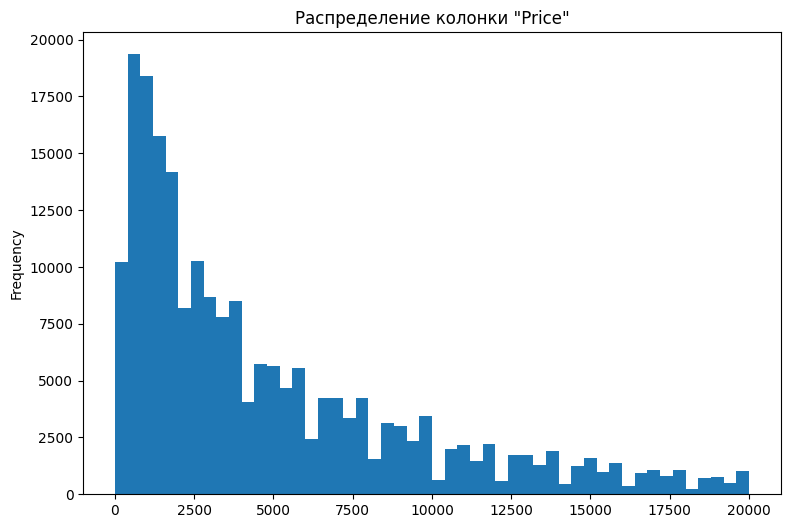

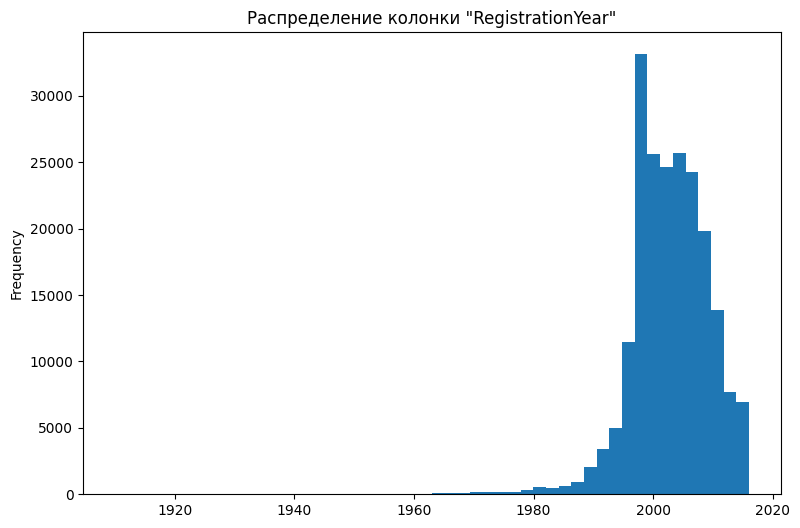

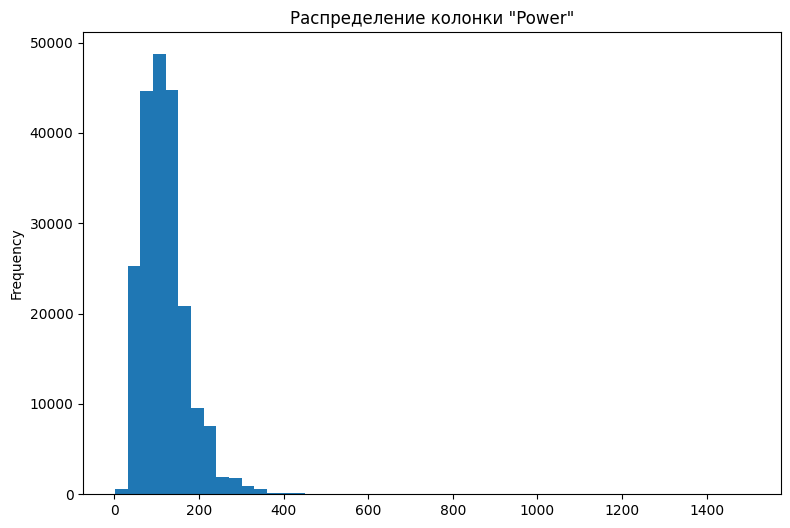

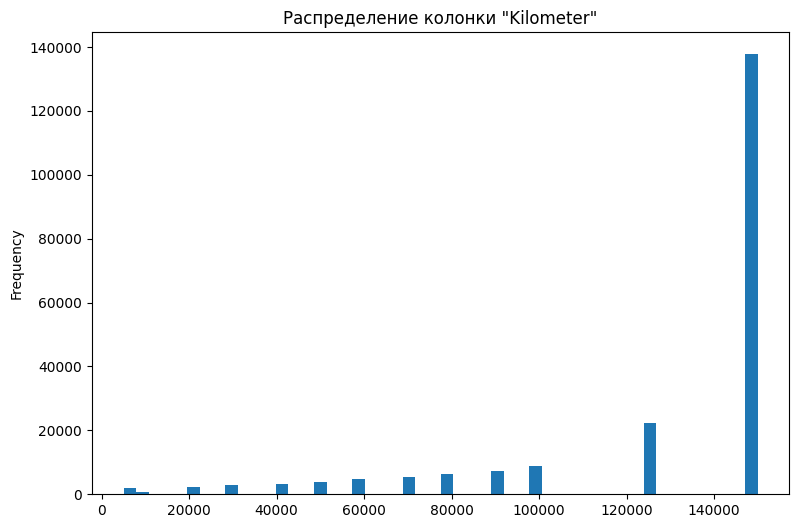

In [26]:
for column in target + num_columns:
    df_train[column].plot(kind='hist', bins=50, title=f'Распределение колонки "{column}"', figsize=(9, 6))
    plt.show()

Графики Price и Power скошены вправо, а RegistrationYear и Kilometer скошены влево.

In [27]:
(df_train_len - df_train.shape[0]) / df_train_len * 100

16.277775986067663

Было удалено 16% от обучающей выборки

##### Категориальные колонки

In [28]:
df_train.select_dtypes(include='object').isna().sum()

VehicleType     7720
Gearbox         3771
Model           7899
FuelType       11029
Brand              0
Repaired       30182
dtype: int64

Во всех категориальных колонках кроме Brand присутствуют пропуски

In [29]:
df_train.select_dtypes(include='object').describe()

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired
count,199958,203907,199779,196649,207678,177496
unique,8,2,249,7,40,2
top,sedan,manual,golf,petrol,volkswagen,no
freq,58189,162691,17219,131370,44887,157349


Все категориальные колонки значимы, сохраню их названия в список cat_columns.

In [30]:
cat_columns = list(df_train.select_dtypes(include='object').columns)
cat_columns

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [31]:
for column in cat_columns:
    print(f'{column}:')
    display(sorted(df_train[column].dropna().unique()))

VehicleType:


['bus', 'convertible', 'coupe', 'other', 'sedan', 'small', 'suv', 'wagon']

Gearbox:


['auto', 'manual']

Model:


['100',
 '145',
 '147',
 '156',
 '159',
 '1_reihe',
 '1er',
 '200',
 '2_reihe',
 '300c',
 '3_reihe',
 '3er',
 '4_reihe',
 '500',
 '5_reihe',
 '5er',
 '601',
 '6_reihe',
 '6er',
 '7er',
 '80',
 '850',
 '90',
 '900',
 '9000',
 '911',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a8',
 'a_klasse',
 'accord',
 'agila',
 'alhambra',
 'almera',
 'altea',
 'amarok',
 'antara',
 'arosa',
 'astra',
 'auris',
 'avensis',
 'aveo',
 'aygo',
 'b_klasse',
 'b_max',
 'beetle',
 'berlingo',
 'bora',
 'boxster',
 'bravo',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c_klasse',
 'c_max',
 'c_reihe',
 'caddy',
 'calibra',
 'captiva',
 'carisma',
 'carnival',
 'cayenne',
 'cc',
 'ceed',
 'charade',
 'cherokee',
 'citigo',
 'civic',
 'cl',
 'clio',
 'clk',
 'clubman',
 'colt',
 'combo',
 'cooper',
 'cordoba',
 'corolla',
 'corsa',
 'cr_reihe',
 'croma',
 'crossfire',
 'cuore',
 'cx_reihe',
 'defender',
 'delta',
 'discovery',
 'doblo',
 'ducato',
 'duster',
 'e_klasse',
 'elefantino',
 'eos',
 'escort',
 'espace',
 

FuelType:


['cng', 'electric', 'gasoline', 'hybrid', 'lpg', 'other', 'petrol']

Brand:


['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lada',
 'lancia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'sonstige_autos',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

Repaired:


['no', 'yes']

Скрытых дублей среди значений категориальных столбцов нет, все категории написаны в одном ("змеином") формате 

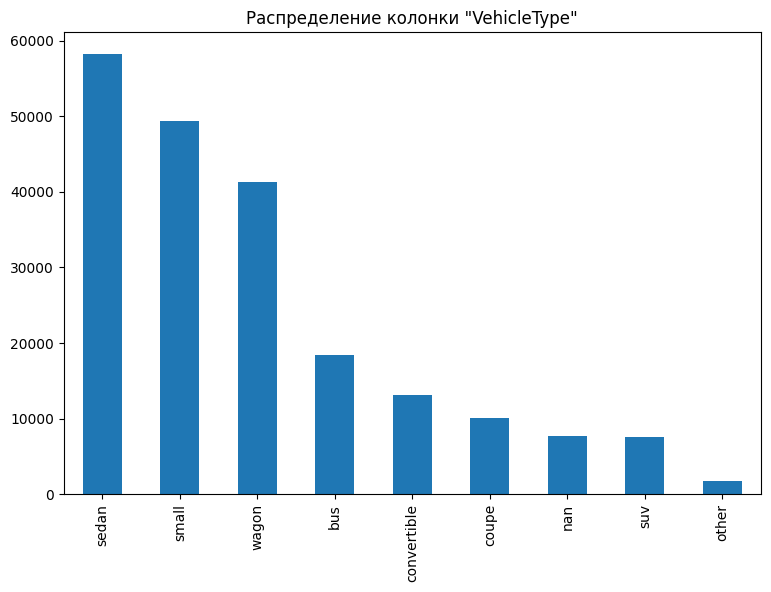

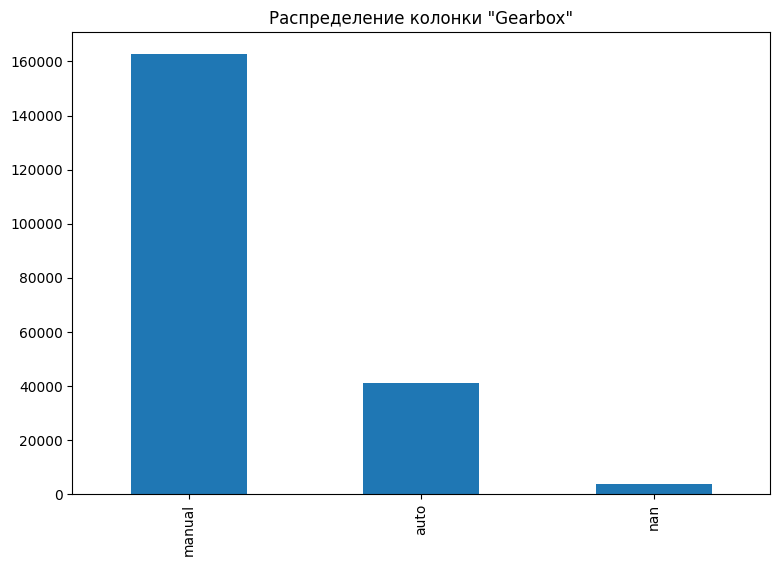

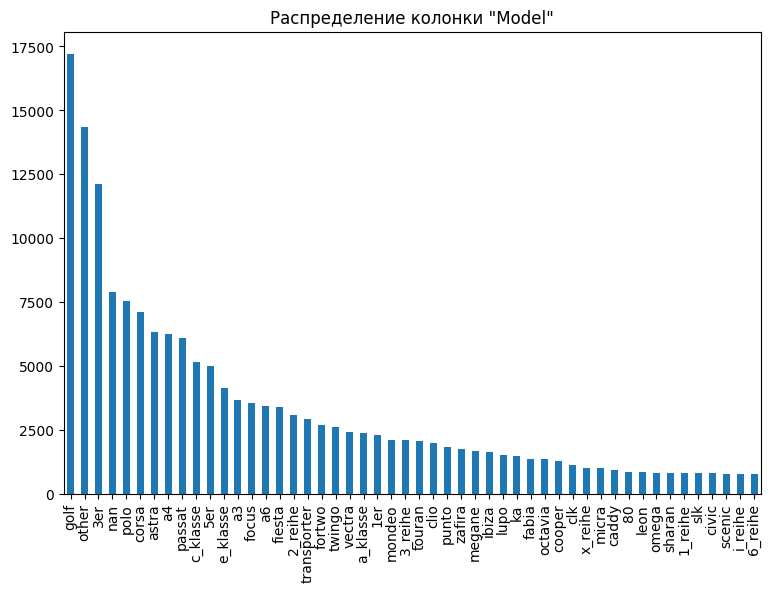

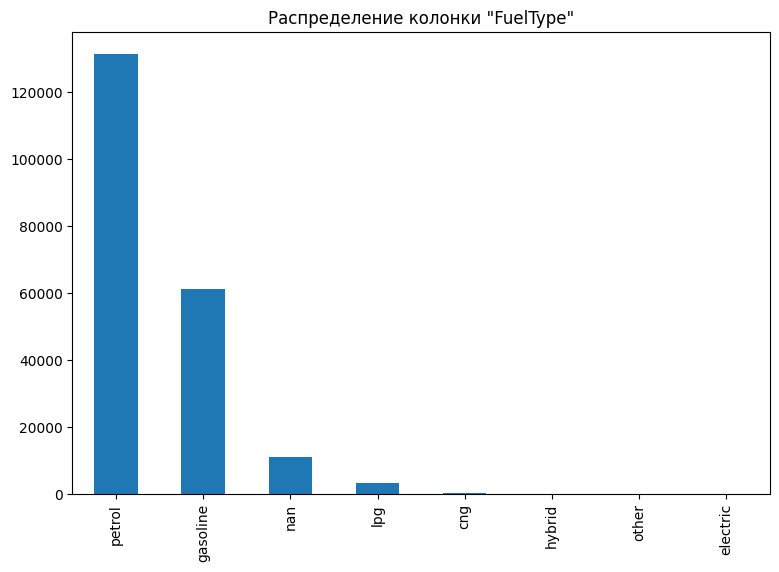

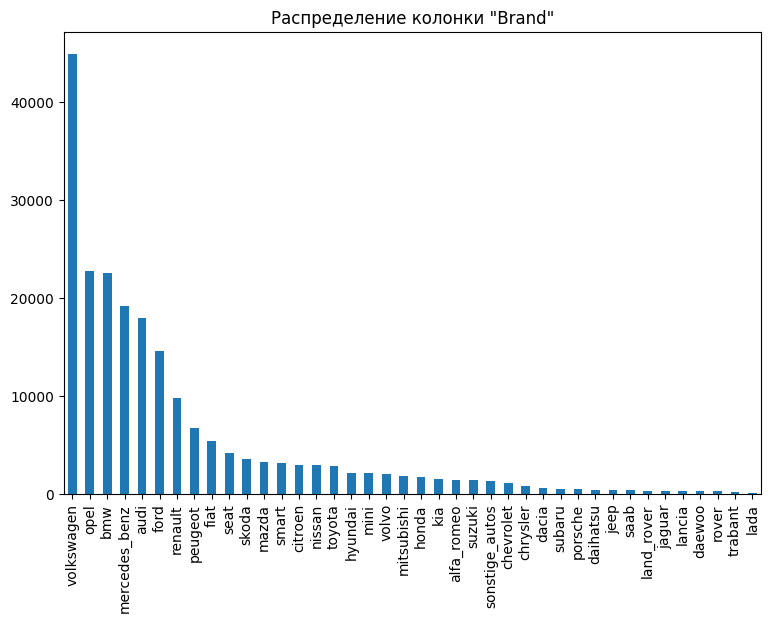

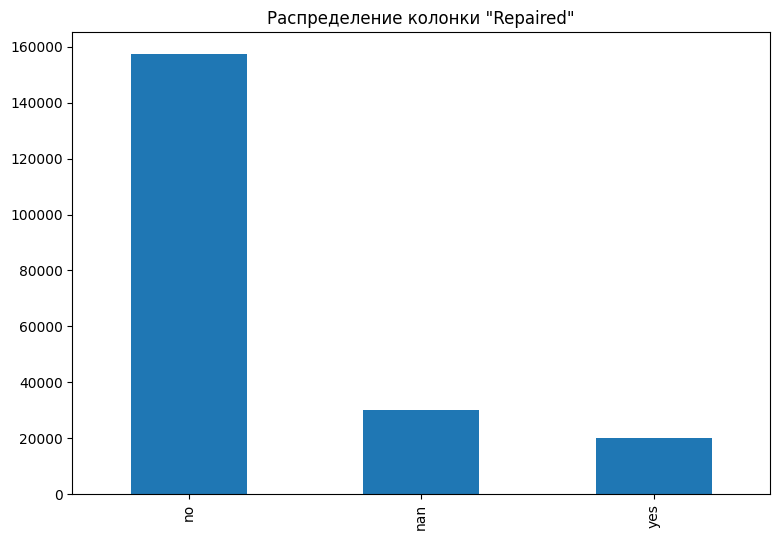

In [32]:
for column in cat_columns:
    df_train[column].value_counts(dropna=False).head(50).plot(kind='bar', title=f'Распределение колонки "{column}"', figsize=(9, 6))
    plt.show()

Из графиков барплот видно, самые популярные типы кузова sedan, small и wagon, еще весьма часто тип кузова пропущен при заполнении. Коробка передач manual встречается в значительно большем количестве записей, чем auto. В датасете больше всего автомобилей модели golf, на втором и третьем месте other и пропущенное значение. Большинство атомобилей поддерживаю бензиновое топливо, на втором месте - газовое. В датасете подавляющее число автомобилей марки volkswagen, далее идут opel и bmw. Пропуски в колонках VehicleType, Gearbox, Model, FuelType заполню самым распрастраненным по Brand (в Brand отсутствуют пропуски). Пропуски в столбце Repaired заполню 'unknown', потому что даже приблизительно предсказать была ли машина в аварии по другим столбцам не представляет возможности.

In [33]:
def get_mode_by_column(data, dividing_column, columns):
    return data.groupby(dividing_column)[columns].\
    agg(lambda x: x.mode()[0] if x.count() != 0 else 'unknown').reset_index()

Функция группирует данные по dividing_column и выдает моды для столбцов columns в виде таблицы

In [34]:
mode_by_brand = get_mode_by_column(df_train, 'Brand', ['VehicleType', 'Gearbox', 'Model', 'FuelType'])
mode_by_brand

,Brand,VehicleType,Gearbox,Model,FuelType
0,alfa_romeo,sedan,manual,156,petrol
1,audi,wagon,manual,a4,petrol
2,bmw,sedan,manual,3er,petrol
3,chevrolet,small,manual,other,petrol
4,chrysler,bus,auto,other,petrol
5,citroen,small,manual,other,petrol
6,dacia,suv,manual,logan,petrol
7,daewoo,small,manual,matiz,petrol
8,daihatsu,small,manual,cuore,petrol
9,fiat,small,manual,punto,petrol


Получаю таблицу соответствия марки машины и самого частого значения для VehicleType, Gearbox, Model, FuelType.

In [35]:
def fillna_with_mode_by_column(fit_data, predict_data, dividing_column, columns):
    mode_by_brand = get_mode_by_column(fit_data, dividing_column, columns)
    mode_df = predict_data.merge(mode_by_brand, how='left', left_on=dividing_column, right_on=dividing_column)[[x + '_y' for x in columns]]
    mode_df.columns = columns
    mode_df = mode_df.set_index(predict_data.index)
    return predict_data[columns].fillna(mode_df)

Функция строит таблицу мод с помощью get_mode_by_column по обучающим данным, затем с помощью merge получает моду для каждой строки данных, которые нужно заполнить, затем заполняет пропущенные поля с помощью таблицы с модами.

In [36]:
df_train[['VehicleType', 'Gearbox', 'Model', 'FuelType']]

,VehicleType,Gearbox,Model,FuelType
246550,bus,manual,caddy,gasoline
113274,small,manual,cooper,petrol
35527,coupe,manual,3er,petrol
321785,small,manual,other,petrol
115179,sedan,manual,golf,petrol
...,...,...,...,...
110268,wagon,auto,3er,gasoline
119879,small,manual,polo,petrol
131932,sedan,manual,5er,petrol
146867,sedan,manual,3er,gasoline


In [37]:
df_train[['VehicleType', 'Gearbox', 'Model', 'FuelType']] = \
fillna_with_mode_by_column(df_train, df_train, 'Brand', ['VehicleType', 'Gearbox', 'Model', 'FuelType'])
df_train[['VehicleType', 'Gearbox', 'Model', 'FuelType']]

,VehicleType,Gearbox,Model,FuelType
246550,bus,manual,caddy,gasoline
113274,small,manual,cooper,petrol
35527,coupe,manual,3er,petrol
321785,small,manual,other,petrol
115179,sedan,manual,golf,petrol
...,...,...,...,...
110268,wagon,auto,3er,gasoline
119879,small,manual,polo,petrol
131932,sedan,manual,5er,petrol
146867,sedan,manual,3er,gasoline


In [38]:
df_train.isna().sum()

DateCrawled              0
Price                    0
VehicleType              0
RegistrationYear         0
Gearbox                  0
Power                    0
Model                    0
Kilometer                0
RegistrationMonth        0
FuelType                 0
Brand                    0
Repaired             30182
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Заполняю пропущенные значения VehicleType, Gearbox, Model, FuelType в train.

In [39]:
df_test[['VehicleType', 'Gearbox', 'Model', 'FuelType']]

,VehicleType,Gearbox,Model,FuelType
294049,wagon,manual,leon,petrol
76415,wagon,manual,a3,gasoline
212563,wagon,manual,passat,gasoline
109307,small,manual,corsa,petrol
248545,NaN,manual,a_klasse,petrol
...,...,...,...,...
254129,wagon,manual,3_reihe,petrol
185667,bus,manual,alhambra,petrol
58518,wagon,NaN,sharan,gasoline
54137,wagon,manual,laguna,petrol


In [40]:
df_test[['VehicleType', 'Gearbox', 'Model', 'FuelType']] = \
fillna_with_mode_by_column(df_train, df_test, 'Brand', ['VehicleType', 'Gearbox', 'Model', 'FuelType'])
df_test[['VehicleType', 'Gearbox', 'Model', 'FuelType']]

,VehicleType,Gearbox,Model,FuelType
294049,wagon,manual,leon,petrol
76415,wagon,manual,a3,gasoline
212563,wagon,manual,passat,gasoline
109307,small,manual,corsa,petrol
248545,sedan,manual,a_klasse,petrol
...,...,...,...,...
254129,wagon,manual,3_reihe,petrol
185667,bus,manual,alhambra,petrol
58518,wagon,manual,sharan,gasoline
54137,wagon,manual,laguna,petrol


In [41]:
df_test.isna().sum()

DateCrawled              0
Price                    0
VehicleType              0
RegistrationYear         0
Gearbox                  0
Power                    0
Model                    0
Kilometer                0
RegistrationMonth        0
FuelType                 0
Brand                    0
Repaired             21200
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Заполняю в df_test пустые значения столбцов на VehicleType, Gearbox, Model, FuelType.

In [42]:
df_train['Repaired'] = df_train.loc[:, 'Repaired'].fillna('unknown')

In [43]:
df_test['Repaired'] = df_test.loc[:, 'Repaired'].fillna('unknown')

In [44]:
df_train.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [45]:
df_test.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

Заполнила все пропуски в Repaired на unknown

In [46]:
X_train = df_train[cat_columns + num_columns]
X_train

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired,RegistrationYear,Power,Kilometer
246550,bus,manual,caddy,gasoline,volkswagen,no,2005,105,150000
113274,small,manual,cooper,petrol,mini,no,2002,116,125000
35527,coupe,manual,3er,petrol,bmw,no,2002,170,125000
321785,small,manual,other,petrol,alfa_romeo,unknown,2009,155,80000
115179,sedan,manual,golf,petrol,volkswagen,no,1999,75,150000
...,...,...,...,...,...,...,...,...,...
110268,wagon,auto,3er,gasoline,bmw,no,2007,286,150000
119879,small,manual,polo,petrol,volkswagen,yes,1998,50,150000
131932,sedan,manual,5er,petrol,bmw,no,2004,192,150000
146867,sedan,manual,3er,gasoline,bmw,no,2004,150,150000


In [47]:
y_train = df_train['Price']
y_train

246550     4600
113274     5300
35527      4990
321785     6499
115179     1400
          ...  
110268    13600
119879      200
131932    12525
146867     4444
121958     9999
Name: Price, Length: 207678, dtype: int64

In [48]:
X_test = df_test[cat_columns + num_columns]
X_test

,VehicleType,Gearbox,Model,FuelType,Brand,Repaired,RegistrationYear,Power,Kilometer
294049,wagon,manual,leon,petrol,seat,no,2014,122,30000
76415,wagon,manual,a3,gasoline,audi,unknown,2011,140,70000
212563,wagon,manual,passat,gasoline,volkswagen,no,2001,131,150000
109307,small,manual,corsa,petrol,opel,yes,1996,60,150000
248545,sedan,manual,a_klasse,petrol,mercedes_benz,unknown,2016,82,150000
...,...,...,...,...,...,...,...,...,...
254129,wagon,manual,3_reihe,petrol,peugeot,no,2008,120,100000
185667,bus,manual,alhambra,petrol,seat,no,2000,116,150000
58518,wagon,manual,sharan,gasoline,volkswagen,unknown,2003,0,150000
54137,wagon,manual,laguna,petrol,renault,no,2003,120,150000


In [49]:
y_test = df_test['Price']
y_test

294049    19999
76415     14250
212563     2850
109307       50
248545      500
          ...  
254129     5950
185667     1600
58518      2550
54137      1900
177556     1250
Name: Price, Length: 106311, dtype: int64

## Обучение моделей

### Подготовка выборки для обучения моделей

In [50]:
column_transformer =\
ColumnTransformer([('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_columns)], 
                  remainder='passthrough')

Применяю OrdinalEncoder к категориальным данным, числовые оставляю как есть. Такой выбор обусловлен тем, что я планирую использовать модели основанный на деревьях решений, они не подвержены проблемам, возникающим из-за разного масштаба столбцов. А так же, потому что требования заказчика включают скорость обучения модели, OrdinalEncoder не увеличивает количество признаков, в отличие от OneHotEncoder, и, соответственно, модели будут обучаться быстрее.

### Метрика качества

In [51]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

В качестве метрики предоженно использовать RMSE.

### RandomForestRegressor

In [52]:
pipeline_rf = Pipeline([('column_transformer', column_transformer),
                        ('rf', RandomForestRegressor(random_state=RANDOM_STATE, 
                                                     n_jobs=-1))])

In [53]:
param_grid = {'rf__n_estimators': range(1, 100), 
              'rf__max_depth': range(1, 50)}

In [54]:
grid_rf = RandomizedSearchCV(estimator=pipeline_rf, 
                             param_distributions=param_grid,
                             n_iter=40, 
                             scoring='neg_mean_squared_error', 
                             random_state=RANDOM_STATE, 
                             n_jobs=-1)
grid_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('column_transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal_encoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['VehicleType',
                                                                                'Gearbox',
                                                                                'Model',
                                                                                'FuelType',
                                                                                'Brand',
                                              

In [55]:
print('Лучшие параметры:', grid_rf.best_params_)
print('MSE на кросс-валидации:', -grid_rf.best_score_)

Лучшие параметры: {'rf__n_estimators': 68, 'rf__max_depth': 21}
MSE на кросс-валидации: 2580609.8593092887


In [56]:
best_rf = Pipeline([('column_transformer', column_transformer),
                    ('rf', RandomForestRegressor(n_estimators=68, max_depth=21, random_state=RANDOM_STATE, n_jobs=-1))])
start = time()
best_rf.fit(X_train, y_train)
end = time()
print('Время обучения:', round(end - start, 2), 'сек.')

Время обучения: 3.78 сек.


In [57]:
start = time()
best_rf.predict(X_train)
end = time()
print('Время предсказания:', round(end - start, 2), 'сек.')

Время предсказания: 0.87 сек.


### LGBMRegressor

In [58]:
pipeline_lgbm = Pipeline([('column_transformer', column_transformer),
                          ('lgbm', LGBMRegressor(objective='regression',
                                                 metric='rmse',
                                                 categorical_feature=[0,1,2,3,4,5],
                                                 seed=RANDOM_STATE))])

In [59]:
param_grid = {'lgbm__num_iterations': range(1, 100), 
              'lgbm__max_depth': range(1, 50), 
              'lgbm__learning_rate' : [0.1, 0.2, 0.5]}

In [60]:
grid_lgbm = RandomizedSearchCV(estimator=pipeline_lgbm, 
                               param_distributions=param_grid,
                               n_iter=100, 
                               scoring='neg_mean_squared_error', 
                               random_state=RANDOM_STATE, 
                               n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('column_transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal_encoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['VehicleType',
                                                                                'Gearbox',
                                                                                'Model',
                                                                                'FuelType',
                                                                                'Brand',
                                              

In [61]:
print('Лучшие параметры:', grid_lgbm.best_params_)
print('MSE на кросс-валидации:', -grid_lgbm.best_score_)

Лучшие параметры: {'lgbm__num_iterations': 98, 'lgbm__max_depth': 14, 'lgbm__learning_rate': 0.2}
MSE на кросс-валидации: 2538716.1417795373


In [62]:
best_lgbm = Pipeline([('column_transformer', column_transformer),
                      ('lgbm', LGBMRegressor(num_iterations=98,
                                             max_depth=14,
                                             learning_rate=0.2,
                                             objective='regression',
                                             metric='rmse',
                                             categorical_feature=[0, 1, 2, 3, 4, 5],
                                             seed=RANDOM_STATE))])
start = time()
best_lgbm.fit(X_train, y_train)
end = time()
print('Время обучения:', round(end - start, 2), 'сек.')

Время обучения: 0.66 сек.


In [63]:
start = time()
best_lgbm.predict(X_train)
end = time()
print('Время предсказания:', round(end - start, 2), 'сек.')

Время предсказания: 0.34 сек.


### DecisionTreeRegressor

In [64]:
pipeline_dt = Pipeline([('column_transformer', column_transformer),
                        ('dt', DecisionTreeRegressor(random_state=RANDOM_STATE))])

In [65]:
param_grid = {'dt__max_depth': range(1, 100), 
              'dt__min_samples_leaf': [50, 100, 200, 500, 1000]}

In [66]:
grid_dt = RandomizedSearchCV(estimator=pipeline_dt, 
                             param_distributions=param_grid,
                             n_iter=40, 
                             scoring='neg_mean_squared_error', 
                             random_state=RANDOM_STATE, 
                             n_jobs=-1)
grid_dt.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('column_transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal_encoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['VehicleType',
                                                                                'Gearbox',
                                                                                'Model',
                                                                                'FuelType',
                                                                                'Brand',
                                              

In [67]:
print('Лучшие параметры:', grid_dt.best_params_)
print('MSE на кросс-валидации:', -grid_dt.best_score_)

Лучшие параметры: {'dt__min_samples_leaf': 50, 'dt__max_depth': 63}
MSE на кросс-валидации: 3565131.377506523


In [68]:
best_dt = Pipeline([('column_transformer', column_transformer),
                    ('dt', DecisionTreeRegressor(min_samples_leaf=50, max_depth=63, random_state=RANDOM_STATE))])
start = time()
best_dt.fit(X_train, y_train)
end = time()
print('Время обучения:', round(end - start, 2), 'сек.')

Время обучения: 0.57 сек.


In [69]:
start = time()
grid_dt.predict(X_train)
end = time()
print('Время предсказания:', round(end - start, 2), 'сек.')

Время предсказания: 0.21 сек.


## Анализ моделей

LGBMRegressor проводит обучение и предсказание за время незначительно превышающее DecisionTreeRegressor, но качество обучение у лучшей модели градиентного бустинга гораздо лучше, чем у лучшей модели дерева решений. Качество лучшей модели RandomForestRegressor сравнимо с бустингом, но скорость обучения в разы проигрывает. Заказчику предлагается модель LGBMRegressor со следующими параметрами.

In [70]:
best_lgbm

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('lgbm',
                 LGBMRegressor(categorical_feature=[0, 1, 2, 3, 4, 5],
                               learning_rate=0.2, max_depth=14, metric='rmse',
                               num_iterations=98, objective='regression',
                               seed=42))])

In [71]:
print('RMSE на трейне лучшей модели:', rmse(y_train, best_lgbm.predict(X_train)))
print('RMSE на тесте лучшей модели:', rmse(y_test, best_lgbm.predict(X_test)))
print('RMSE на тесте "наивного" регрессора:', rmse(y_test, DummyRegressor().fit(X_train, y_train).predict(X_test)))

RMSE на трейне лучшей модели: 1510.1920179404347
RMSE на тесте лучшей модели: 1829.479151081932
RMSE на тесте "наивного" регрессора: 4544.182722303984


In [74]:
feature_importances = pd.Series(data=best_lgbm.steps[1][1].feature_importances_, index=cat_columns + num_columns).sort_values(ascending=False)
feature_importances

RegistrationYear    732
Model               702
Power               682
Kilometer           291
Brand               208
VehicleType         137
Repaired             98
Gearbox              49
FuelType             41
dtype: int32

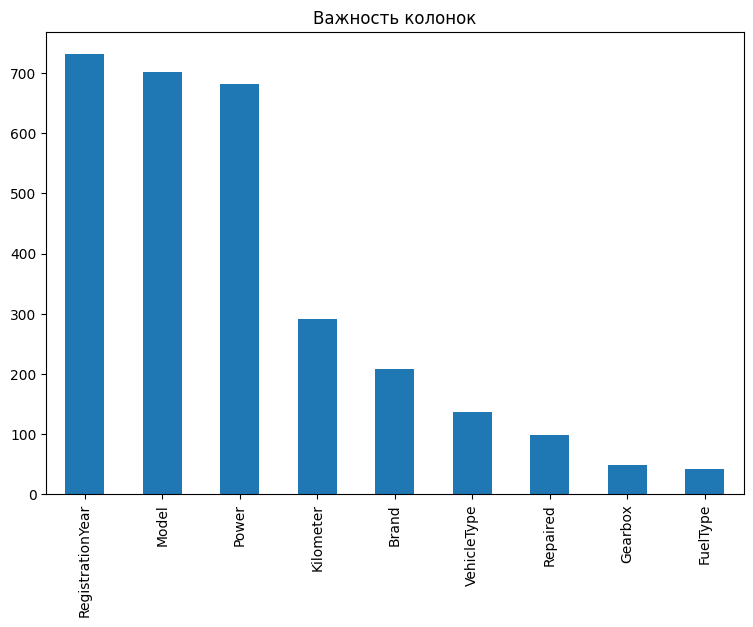

In [75]:
feature_importances.plot(kind='bar', title=f'Важность колонок', figsize=(9, 6));

Для лучшей модели самые важные колонки год регистрации, модель и мощность